In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
train_data = pd.read_csv('train1.csv')
test_data = pd.read_csv('test1.csv')

Text(0.5,0,'YearRemodAdd')

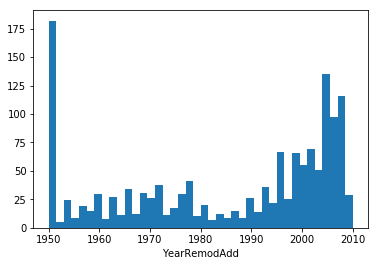

In [3]:
plt.hist(train_data['YearRemodAdd'],bins=40)
plt.xlabel('YearRemodAdd')

In [4]:
X_train=train_data.drop('SalePrice',axis=1)
y_train=train_data[['SalePrice']]
X_train_data=train_data.drop('SalePrice',axis=1)
y_train_data=train_data[['SalePrice']]

In [5]:
X_train.columns[X_train.isnull().sum()!=0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
X_test=test_data

In [9]:
X_test=X_test.drop(['Id'] ,axis=1)

In [10]:
X_train=X_train.drop(['Id'] ,axis=1)

In [11]:
# データ補完
# 'MasVnrType' 'MasVnrArea'はデータないので同じ
X_train['MasVnrArea']=X_train['MasVnrArea'].fillna(0.0)
X_train['MasVnrType']=X_train['MasVnrType'].fillna('None')
X_train['FireplaceQu']=X_train['FireplaceQu'].fillna('NA')
X_train['PoolQC']=X_train['PoolQC'].fillna('NA')
X_train['Alley']=X_train['Alley'].fillna('NA')
X_train['Fence']=X_train['Fence'].fillna('NA')
X_train['MiscFeature']=X_train['MiscFeature'].fillna('NA')
X_train['Electrical']=X_train['Electrical'].fillna('SBrkr')
X_train['LotFrontage']=X_train.interpolate(method='linear')['LotFrontage']
X_train['GarageYrBlt'][X_train['GarageYrBlt'].isnull()]=X_train['YearBuilt'][X_train['GarageYrBlt'].isnull()]

X_train.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]\
=X_train.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]\
.fillna('NA')
X_train.loc[:,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]\
=X_train.loc[:,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].fillna(0)

X_train.loc[:,['GarageType','GarageFinish', 'GarageQual', 'GarageCond']]\
=X_train.loc[:,['GarageType','GarageFinish','GarageQual', 'GarageCond']].fillna('NA')
X_train.loc[:,['GarageCars', 'GarageArea']]\
=X_train.loc[:,['GarageCars', 'GarageArea']].fillna(0)

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [12]:
X_test['MasVnrArea']=X_test['MasVnrArea'].fillna(0.0)
X_test['MasVnrType']=X_test['MasVnrType'].fillna('None')
X_test['FireplaceQu']=X_test['FireplaceQu'].fillna('NA')
X_test['PoolQC']=X_test['PoolQC'].fillna('NA')
X_test['MiscFeature']=X_test['MiscFeature'].fillna('NA')
X_test['Electrical']=X_test['Electrical'].fillna('SBrkr')
X_test['LotFrontage']=X_test.interpolate(method='linear')['LotFrontage']
X_test['GarageYrBlt'][X_test['GarageYrBlt'].isnull()]=X_test['YearBuilt'][X_test['GarageYrBlt'].isnull()]

X_test.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]\
=X_test.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]\
.fillna('NA')
X_test.loc[:,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]\
=X_test.loc[:,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].fillna(0)

X_test.loc[:,['GarageType','GarageFinish', 'GarageQual', 'GarageCond']]\
=X_test.loc[:,['GarageType','GarageFinish','GarageQual', 'GarageCond']].fillna('NA')
X_test.loc[:,['GarageCars', 'GarageArea']]\
=X_test.loc[:,['GarageCars', 'GarageArea']].fillna(0)

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
X_test.loc[:,['YearBuilt']]=2011-X_test.loc[:,['YearBuilt']]
X_test.loc[:,['YearRemodAdd']]=2011-X_test.loc[:,['YearRemodAdd']]
X_test['YrSold']=2011-X_train['YrSold']
X_test['GarageYrBlt']=2011-X_train['GarageYrBlt']

In [14]:
X_train.loc[:,['YearBuilt']]=2011-X_train.loc[:,['YearBuilt']]
X_train.loc[:,['YearRemodAdd']]=2011-X_train.loc[:,['YearRemodAdd']]
X_train['YrSold']=2011-X_train['YrSold']
X_train['GarageYrBlt']=2011-X_train['GarageYrBlt']

In [15]:
y_train=np.log(y_train)

In [16]:
#新しい特徴量の作成
X_train['TotalFlrSF']=X_train['1stFlrSF']+X_train['2ndFlrSF']+X_train['TotalBsmtSF']
X_train["TotalSFforHouse"] = X_train["GrLivArea"] + X_train["TotalBsmtSF"]
X_train['Total-LowQual']=X_train['TotalFlrSF']-X_train['LowQualFinSF']
X_train['YrMoSold']=X_train['YearRemodAdd']+1-X_train['YrSold']-X_train['MoSold']/12

In [17]:
X_test['TotalFlrSF']=X_test['1stFlrSF']+X_test['2ndFlrSF']+X_test['TotalBsmtSF']
X_test["TotalSFforHouse"] = X_test["GrLivArea"] + X_test["TotalBsmtSF"]
X_test['Total-LowQual']=X_test['TotalFlrSF']-X_test['LowQualFinSF']
X_test['YrMoSold']=X_test['YearRemodAdd']+1-X_test['YrSold']-X_test['MoSold']/12

In [18]:
#確認
X_train.isnull().sum()[X_train.isnull().sum()!=0]

Series([], dtype: int64)

In [19]:
train_data=pd.concat([X_train,y_train],axis=1)

In [22]:
#ラベルづけ
from sklearn.preprocessing import LabelEncoder

for i in range(X_train.shape[1]):
    if X_train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(X_train.iloc[:,i].values))
        X_train.iloc[:,i] = lbl.transform(list(X_train.iloc[:,i].values))
#         print(X_train.columns[[i]],lbl.classes_)

In [27]:
# OverallQualの順序の重要性の確認
# # mapping_rm={7:'a',2:'b',4:'c',0:'d',1:'e',6:'f',3:'g',8:'h',5:'i',9:'l'}
# n=10
# for i in [7,2,4,0,1,6,3,8,5,9]:
#     X_train['OverallQual'][X_train['OverallQual']==i]=n
#     n+=1

# X_train['OverallQual']-=10

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training done using Random Forest


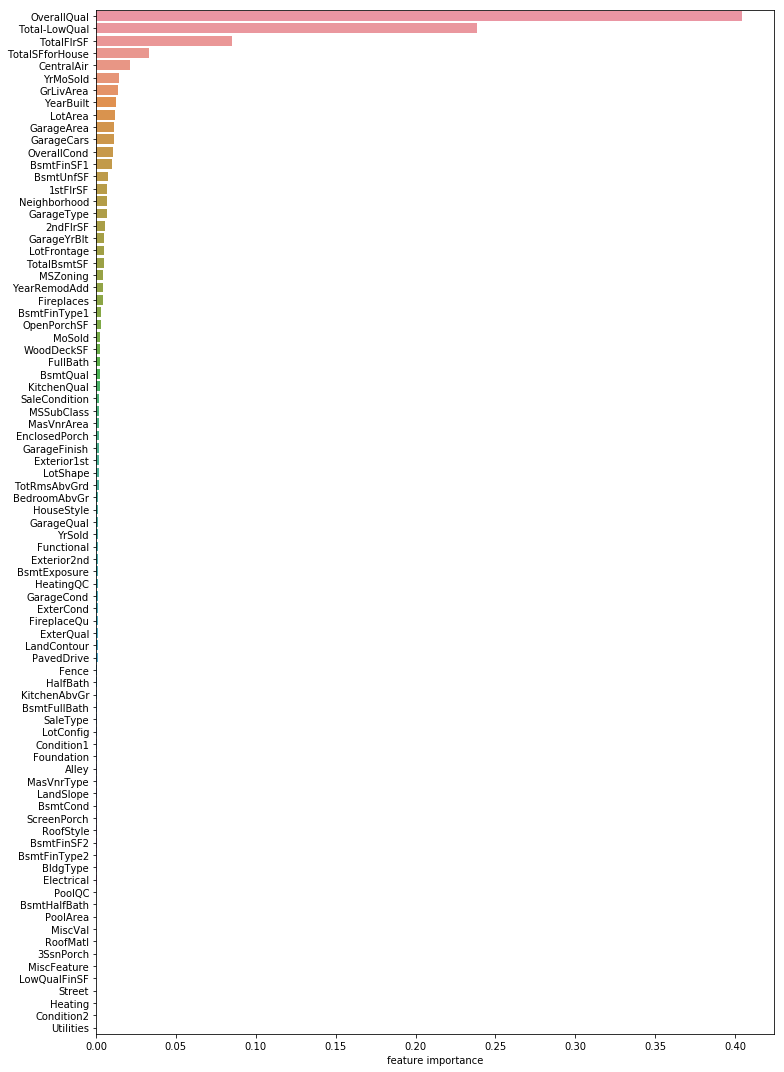

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 15))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [30]:
#ラベリング前のデータ
X_train_pickup=train_data.iloc[:,ranking[:35]]
X_test_pickup=X_test.iloc[:,ranking[:35]]
X_train_pickup.dtypes

OverallQual          int64
Total-LowQual        int64
TotalFlrSF           int64
TotalSFforHouse      int64
CentralAir          object
YrMoSold           float64
GrLivArea            int64
YearBuilt            int64
LotArea              int64
GarageArea           int64
GarageCars           int64
OverallCond          int64
BsmtFinSF1           int64
BsmtUnfSF            int64
1stFlrSF             int64
Neighborhood        object
GarageType          object
2ndFlrSF             int64
GarageYrBlt        float64
LotFrontage        float64
TotalBsmtSF          int64
MSZoning            object
YearRemodAdd         int64
Fireplaces           int64
BsmtFinType1        object
OpenPorchSF          int64
MoSold               int64
WoodDeckSF           int64
FullBath             int64
BsmtQual            object
KitchenQual         object
SaleCondition       object
MSSubClass           int64
MasVnrArea         float64
EnclosedPorch        int64
dtype: object

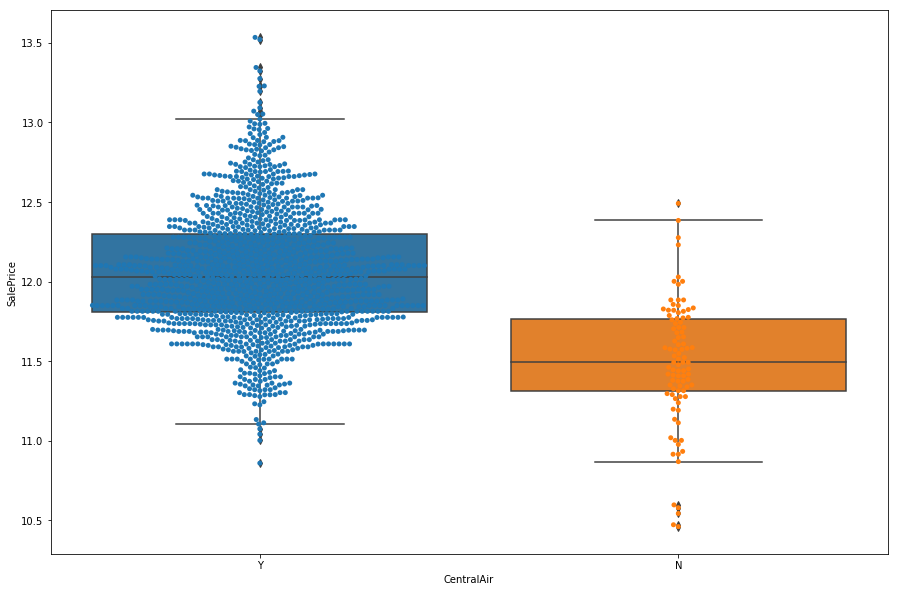

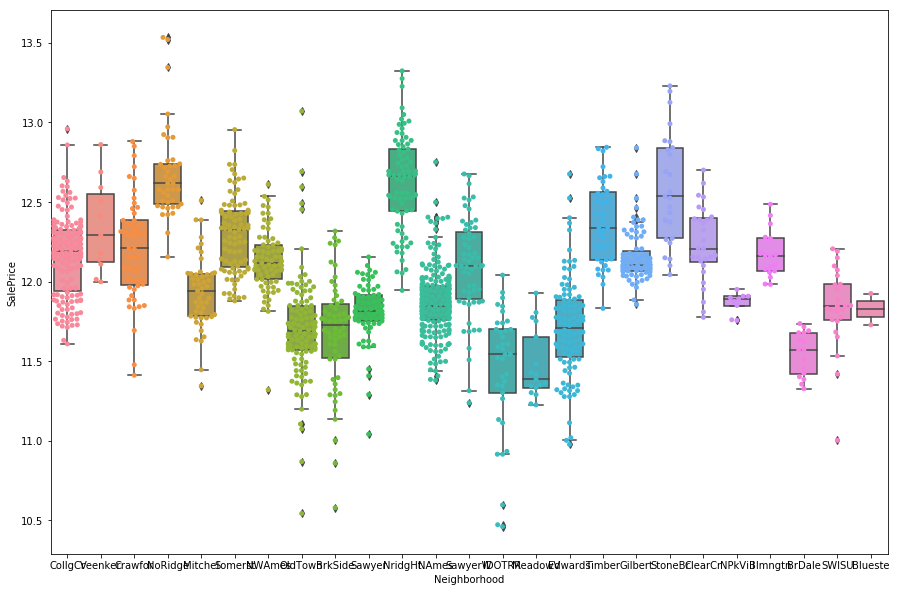

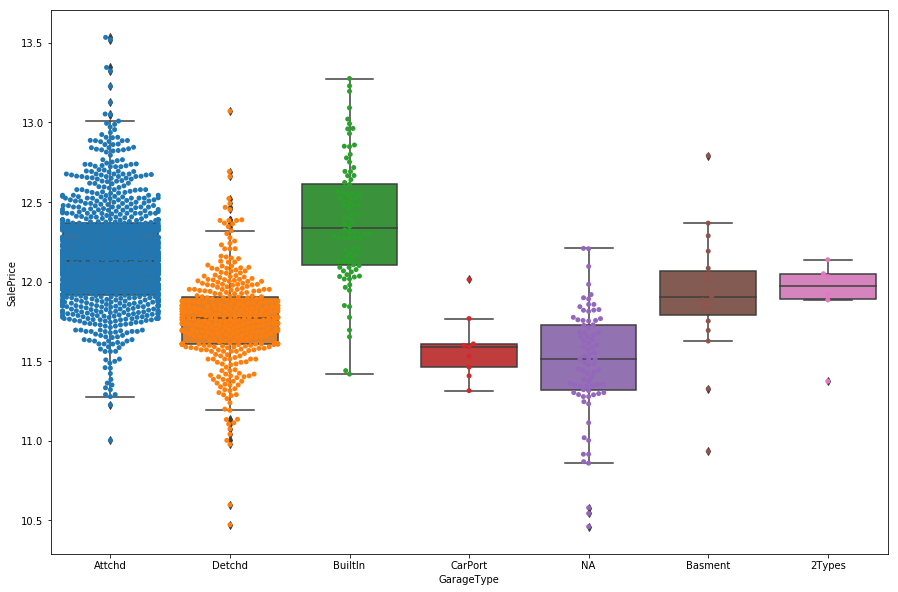

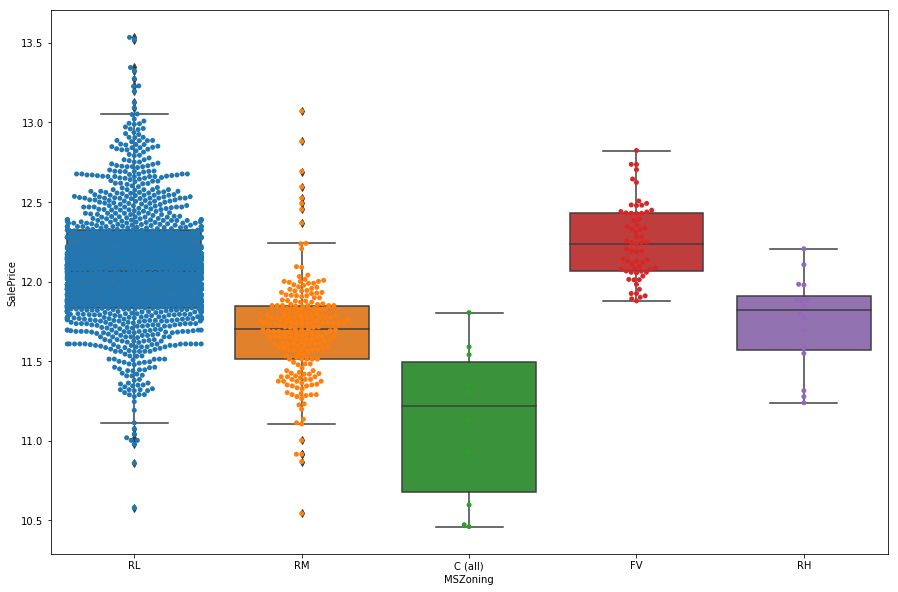

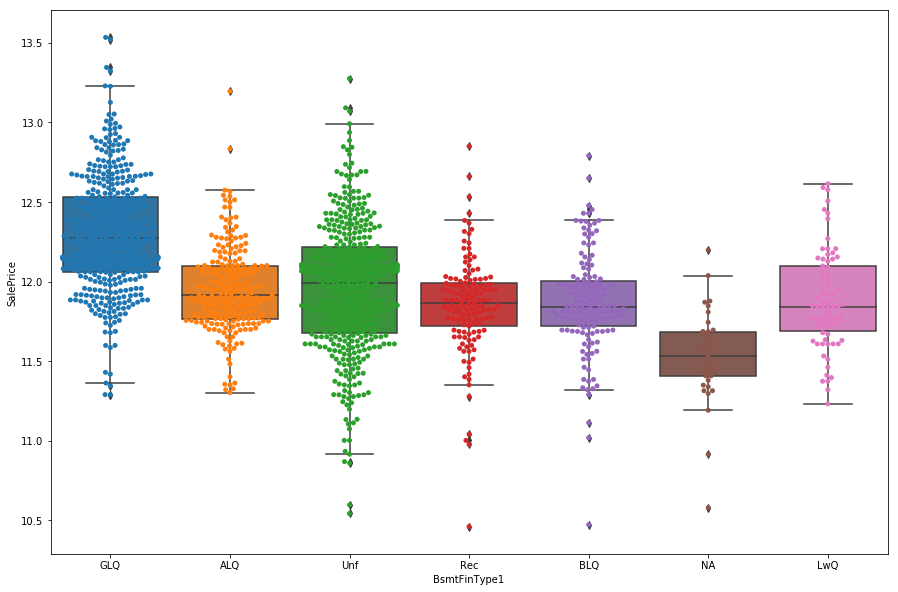

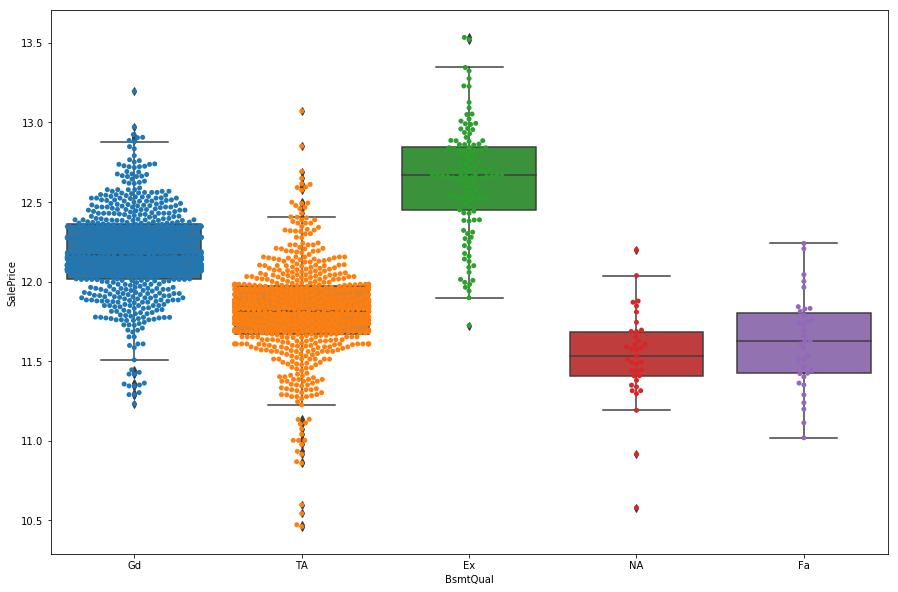

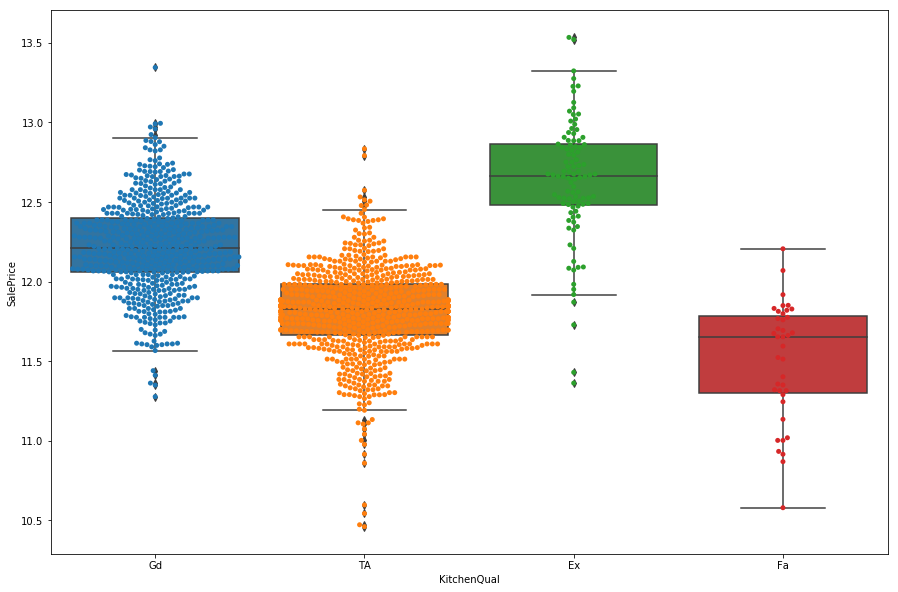

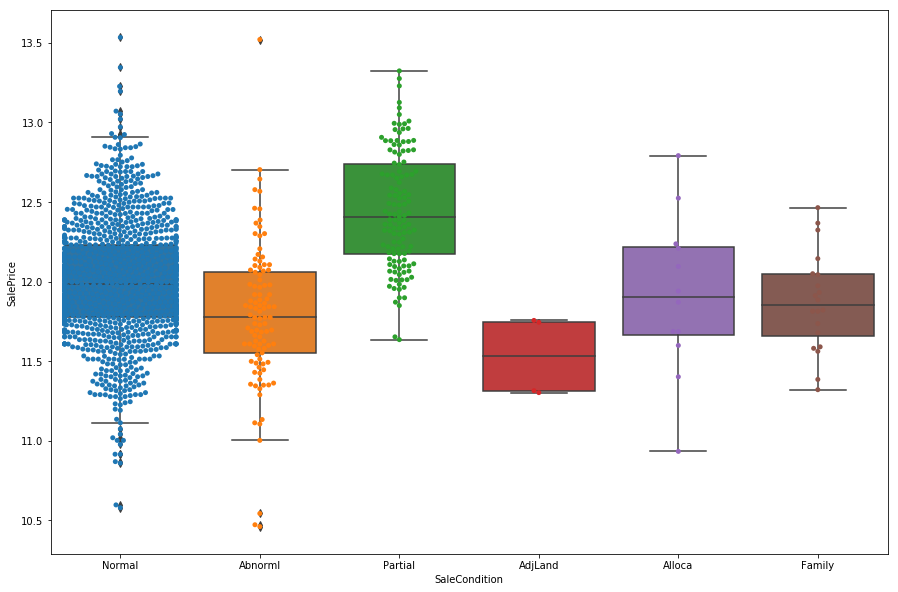

In [31]:
# 図
for i in range(X_train_pickup.shape[1]):
    if X_train_pickup.dtypes[i]==object:
        plt.figure(figsize=(15,10))
        sns.boxplot(x=X_train_pickup.columns[i],y='SalePrice',data=pd.concat([X_train_pickup,y_train],axis=1))
        sns.swarmplot(x=X_train_pickup.columns[i],y='SalePrice',data=pd.concat([X_train_pickup,y_train],axis=1))
        plt.show

KeyError: 'the label [MSZoning] is not in the [columns]'

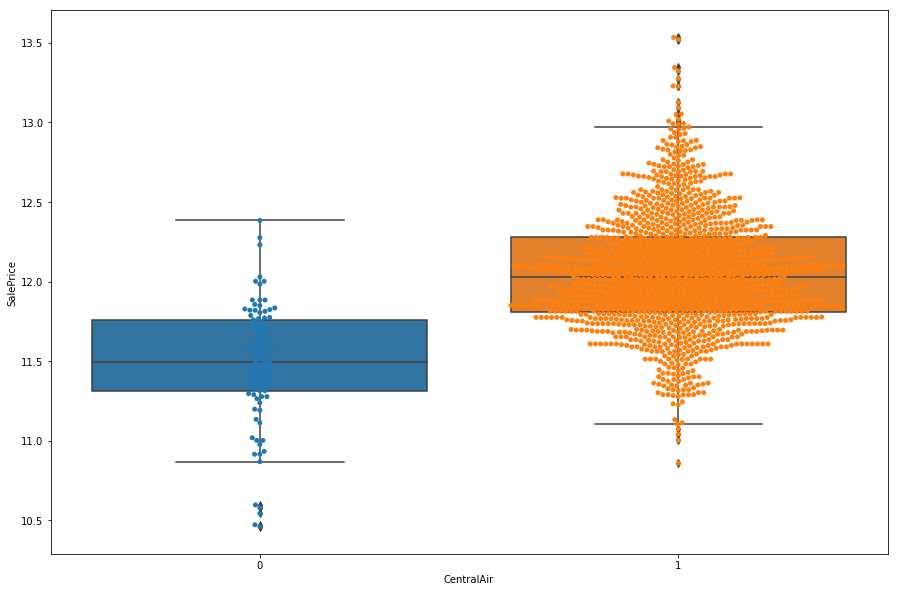

<Figure size 1080x720 with 0 Axes>

In [122]:
for i in ['CentralAir','MSZoning','GarageType','BsmtQual','KitchenQual','BsmtFinType1','GarageFinish','GarageQual','LotShape']:
    plt.figure(figsize=(15,10))
    sns.boxplot(x=X_train_pickup.loc[:,i],y='SalePrice',data=pd.concat([X_train_pickup,y_train],axis=1)) 
    sns.swarmplot(x=X_train_pickup.loc[:,i],y='SalePrice',data=pd.concat([X_train_pickup,y_train],axis=1))
    plt.show

In [33]:
mapping_series={}
mapping_series['CentralAir']={'N':0,'Y':1}
# mapping_series['MSZoning']={'C (all)':0,'RM':1,'RH':2,'FV':4,'RL':3}
mapping_series['GarageType']={'CarPort':0,'NA':1,'Detchd':2,'Basment':3,'2Types':4,'Attchd':4,'BuiltIn':6}
mapping_series['KitchenQual']={'Fa':0,'TA':1,'Gd':2,'Ex':3}
mapping_series['BsmtQual']={'NA':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
mapping_series['BsmtFinType1']={'NA':0,'Unf':1,'LwQ':2,'Rec':2,'BLQ':2,'ALQ':2,'GLQ':3}
mapping_series['GarageQual']={'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':4}
# mapping_series['GarageFinish']={'NA':0,'Unf':1,'RFn':2,'Fin':3}
mapping_series['ExterQual']={'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4}
mapping_series['LotShape']={'IR3':0,'IR2':1,'IR1':2,'Reg':3}

In [35]:
for i in mapping_series.keys():
    if i in X_train_pickup.columns:
        X_train_pickup[i]=X_train_pickup[i].map(mapping_series[i])
        X_test_pickup[i]=X_test_pickup[i].map(mapping_series[i])

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
X_train_pickup= pd.get_dummies(X_train_pickup)

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training done using Random Forest


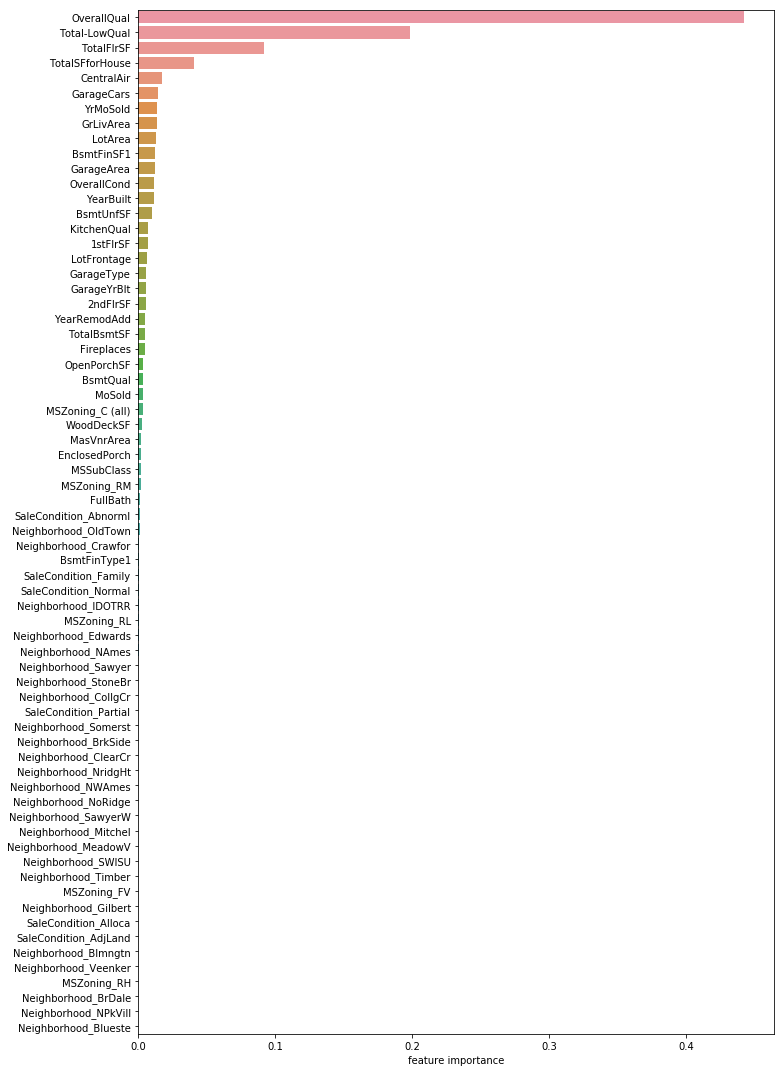

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train_pickup, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 15))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train_pickup.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [49]:
X_train_pickup=X_train_pickup.iloc[:,:15]
X_test_pickup=X_test.loc[:,X_train_pickup.columns]
X_test_pickup.columns

Index(['OverallQual', 'Total-LowQual', 'TotalFlrSF', 'TotalSFforHouse',
       'CentralAir', 'YrMoSold', 'GrLivArea', 'YearBuilt', 'LotArea',
       'GarageArea', 'GarageCars', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF',
       '1stFlrSF'],
      dtype='object')

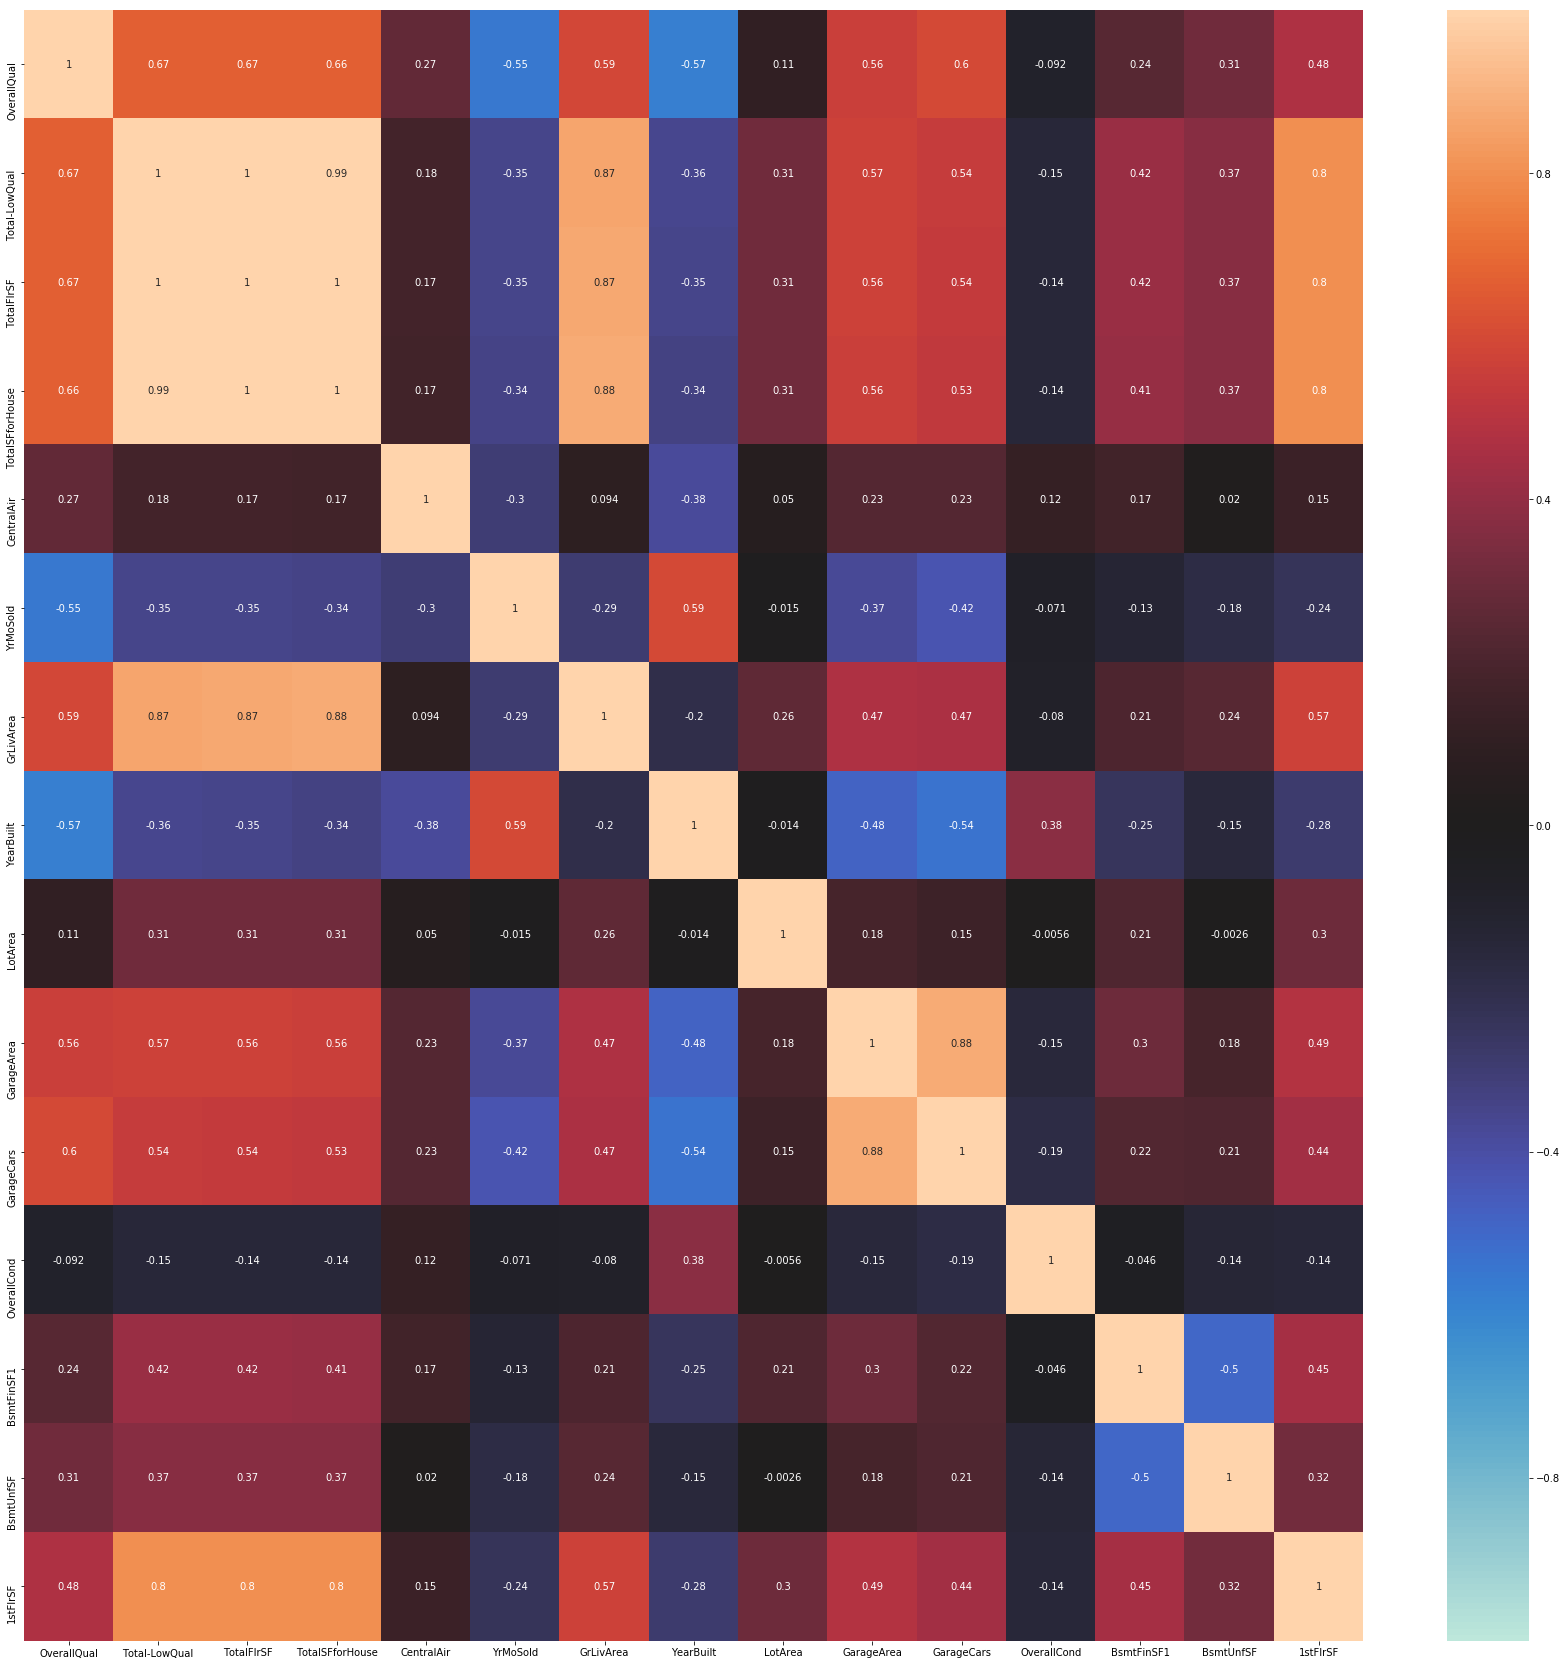

In [50]:
#相関係数行列の可視化
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
sns.heatmap(X_train_pickup.corr(), vmax=1, vmin=-1, center=0, annot=True, ax=ax)

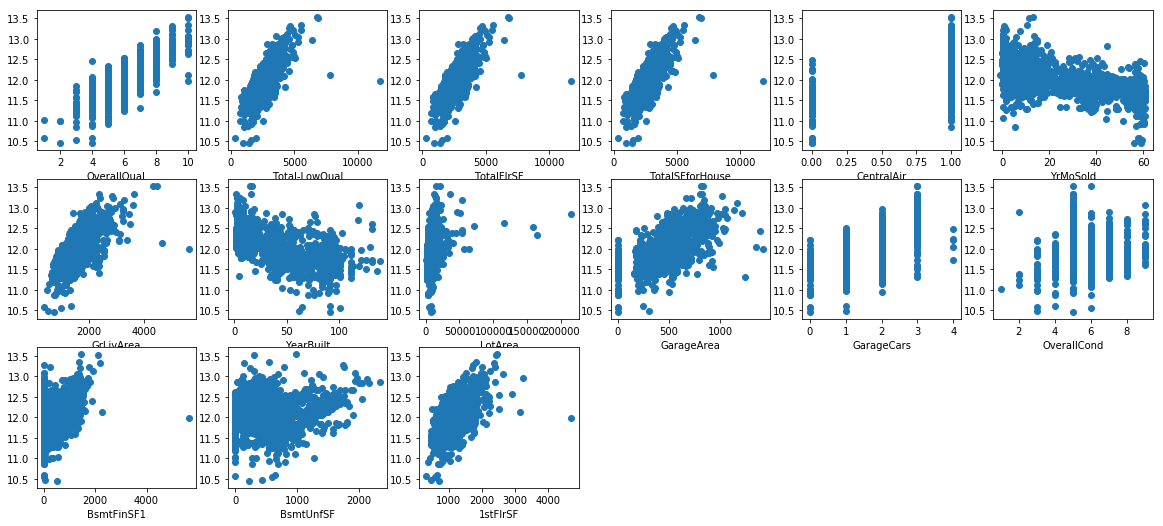

In [51]:
fig=plt.figure(figsize=(20,15))
for i in np.arange(X_train_pickup.shape[1]):
    ax=fig.add_subplot(5,6,i+1)
    plt.scatter(X_train_pickup.iloc[:,i], y_train)
    plt.xlabel(X_train_pickup.columns[i])
plt.show()

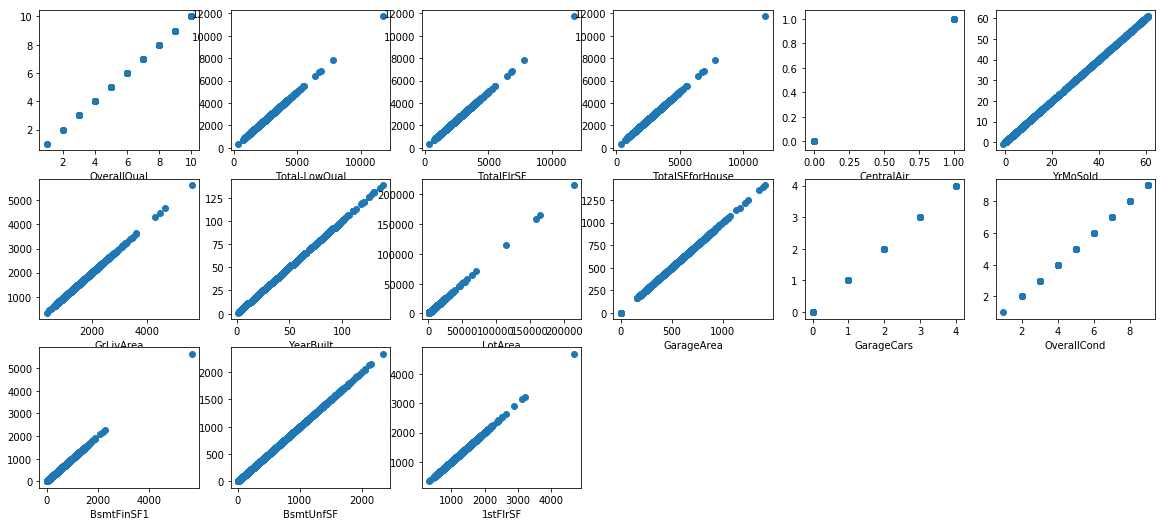

In [52]:
fig=plt.figure(figsize=(20,15))
for i in np.arange(X_train_pickup.shape[1]):
    ax=fig.add_subplot(5,6,i+1)
    plt.scatter(X_train_pickup.iloc[:,i], X_train_pickup.iloc[:,i])
    plt.xlabel(X_train_pickup.columns[i])
plt.show()

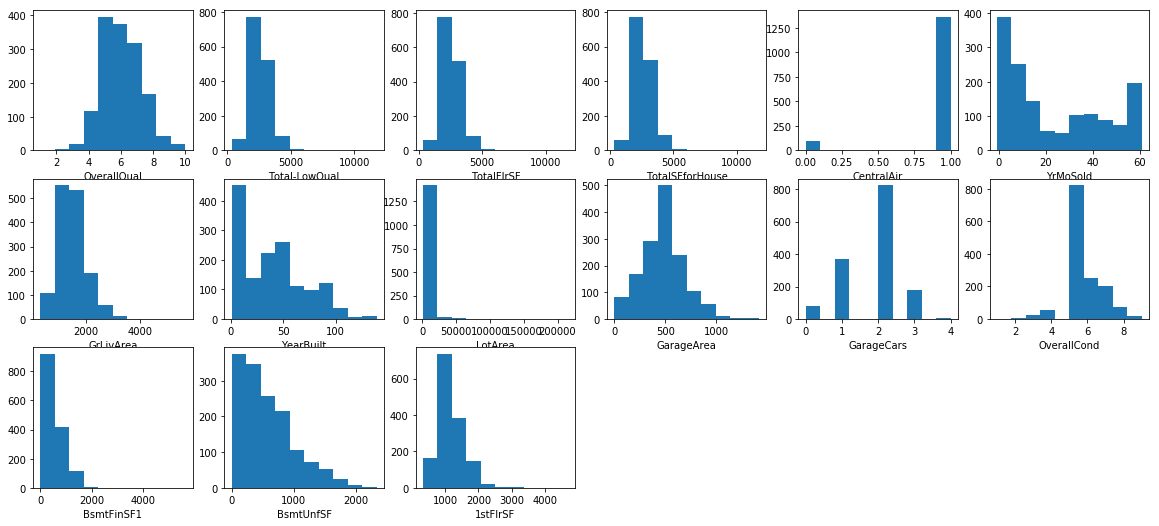

In [53]:
fig=plt.figure(figsize=(20,15))
for i in np.arange(X_train_pickup.shape[1]):
    ax=fig.add_subplot(5,6,i+1)
    plt.hist(X_train_pickup.iloc[:,i])
    plt.xlabel(X_train_pickup.columns[i])
plt.show()

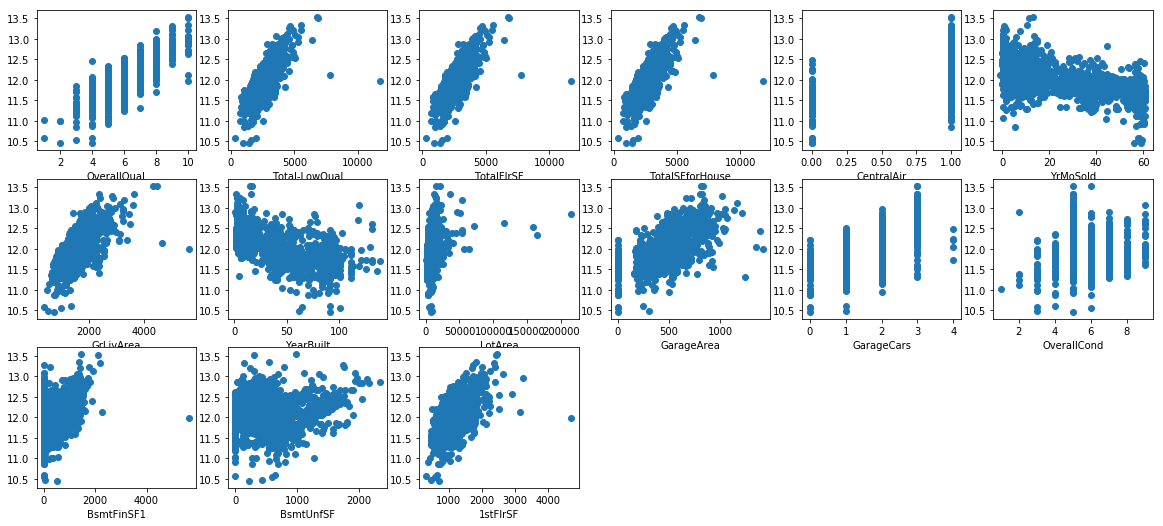

In [54]:
fig=plt.figure(figsize=(20,15))
for i in np.arange(X_train_pickup.shape[1]):
    ax=fig.add_subplot(5,6,i+1)
    plt.scatter(X_train_pickup.iloc[:,i], y_train)
    plt.xlabel(X_train_pickup.columns[i])
plt.show()

In [55]:
X_train_pickup.drop(['TotalFlrSF', 'TotalSFforHouse','GrLivArea', 'GarageArea'],axis=1,inplace=True)
X_test_pickup.drop(['TotalFlrSF', 'TotalSFforHouse','GrLivArea','GarageArea'],axis=1,inplace=True)

In [56]:
X_mat = X_train_pickup
X_mat['SalePrice'] = y_train
# X_mat=X_mat.drop(X_mat[(X_mat['TotalFlrSF']>6000)&(X_mat['SalePrice']<12.5)].index)
# X_mat=X_mat.drop(X_mat[(X_mat['GrLivArea']>4000)].index)
X_mat=X_mat.drop(X_mat[(X_mat['BsmtFinSF1']>4000)].index)
X_mat=X_mat.drop(X_mat[(X_mat['LotArea']>40000)].index)
X_mat=X_mat.drop(X_mat[(X_mat['OverallCond']==2)&(X_mat['SalePrice']>12.5)].index)
X_mat.drop(X_mat[(X_mat['YearBuilt']>110)&(X_mat['SalePrice']>12.3)].index,inplace=True)
# X_mat=X_mat.drop(X_mat[(X_mat['1stFlrSF']>4000)].index)
y_train = X_mat['SalePrice']
X_train_pickup = X_mat.drop(['SalePrice'], axis=1)

In [58]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [64]:
X_train_pickup.head()

,OverallQual,Total-LowQual,CentralAir,YrMoSold,YearBuilt,LotArea,GarageCars,OverallCond,BsmtFinSF1,BsmtUnfSF,1stFlrSF
0,7,2566,1,5.833333,8,8450,2,5,706,150,856
1,6,2524,1,31.583333,35,9600,2,8,978,284,1262
2,7,2706,1,6.250000,10,11250,2,5,486,434,920
3,7,2473,1,36.833333,96,9550,3,5,216,540,961
4,8,3343,1,8.000000,11,14260,3,5,655,490,1145


In [105]:
from sklearn.model_selection import train_test_split
X_train_sp,X_test_sp,y_train_sp,y_test_sp=train_test_split(X_train_pickup,y_train,test_size=0.3,random_state=0)
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_sp,y_train_sp)
# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(np.exp(y_train_sp), np.exp(lr.predict(X_train_sp))) ** (1/2)))
print('test : %.3f' % (mse(np.exp(y_test_sp), np.exp(lr.predict(X_test_sp))) ** (1/2)))

RMSE
train: 24138.857
test : 22722.402


In [68]:
#モデルの呼び出し
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn import svm
lasso = Lasso()
rf = RandomForestRegressor()
svr = svm.SVR()

In [92]:
from sklearn.model_selection import GridSearchCV, train_test_split
#グリッドサーチ用パラメータの設定
lasso_parameters = {'alpha':[0.0005,0.005,0.1, 0.5, 1]}
rf_parameters= {'n_estimators':[25,50,100, 500], 'max_depth':[2,3, 5, 10,15]}
svr_parameters = {"C": [1e-1,1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)}
#グリッドサーチ
lasso_gs = GridSearchCV(lasso, lasso_parameters)
lasso_gs.fit(X_train_sp,y_train_sp)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0005, 0.005, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
rf_gs = GridSearchCV(rf, rf_parameters)
rf_gs.fit(X_train_sp,y_train_sp)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [25, 50, 100, 500], 'max_depth': [2, 3, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
svr_gs = GridSearchCV(svr, svr_parameters)
svr_gs.fit(X_train_sp,y_train_sp)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
print(lasso_gs.best_params_)
print(rf_gs.best_params_)
print(svr_gs.best_params_)
np.logspace(-2, 2, 5)

{'alpha': 0.0005}
{'max_depth': 15, 'n_estimators': 50}
{'C': 10.0, 'gamma': 0.01}


array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [96]:
#ラッソ回帰
y_pred = lasso_gs.predict(X_test_sp)
y_pred_t=lasso_gs.predict(X_train_sp)
print("ラッソ回帰でのRMSE:%.3f",(mse(np.exp(y_test_sp), np.exp(y_pred))**(1/2)))
print(mse(np.exp(y_train_sp), np.exp(y_pred_t))**(1/2))
#ランダムフォレスト
y_pred2 = rf_gs.predict(X_test_sp)
y_pred2_t=rf_gs.predict(X_train_sp)
# ランダムフォレスト
print('train,test')
print("ランダムフォレスト:train",(mse(np.exp(y_train_sp), np.exp(y_pred2_t)))**(1/2))
print("test:",mse(np.exp(y_test_sp), np.exp(y_pred2))**(1/2))
# print("ランダムフォレストでのRMSE:%.3f"(mse(y_test_sp, y_pred2)**(1/2)))
#SVR
y_pred3 = svr_gs.predict(X_test_sp)
y_pred3_t=svr_gs.predict(X_train_sp)
print("SVRでのRMSE:train",(mse(np.exp(y_train_sp), np.exp(y_pred3_t))**(1/2)))
print(mse(np.exp(y_test_sp), np.exp(y_pred3))**(1/2))

ラッソ回帰でのRMSE:%.3f 22732.438019770296
24147.337417126673
train,test
ランダムフォレスト:train 10281.488925330548
test: 25070.168367191014
SVRでのRMSE:train 17903.90035249929
82675.38148862807


In [98]:
# XGBoost
import xgboost as xgb

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
xgb_gs = GridSearchCV(xgb_model,
                   {'max_depth': [2,3,4],
                    'n_estimators': [5,6,7,8,9,10,25,50,100,200]}, verbose=1)
xgb_gs.fit(X_train_sp, y_train_sp)

Parameter optimization
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4], 'n_estimators': [5, 6, 7, 8, 9, 10, 25, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [99]:
print(xgb_gs.best_params_)

{'max_depth': 2, 'n_estimators': 200}


In [100]:
y_predx_t=xgb_gs.predict(X_train_sp)
y_predx=xgb_gs.predict(X_test_sp)
print(mse(np.exp(y_train_sp), np.exp(y_predx_t))**(1/2))
mse(np.exp(y_test_sp), np.exp(y_predx))**(1/2)

18191.850629020602


24113.757478179028

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'log(SalePrice)')

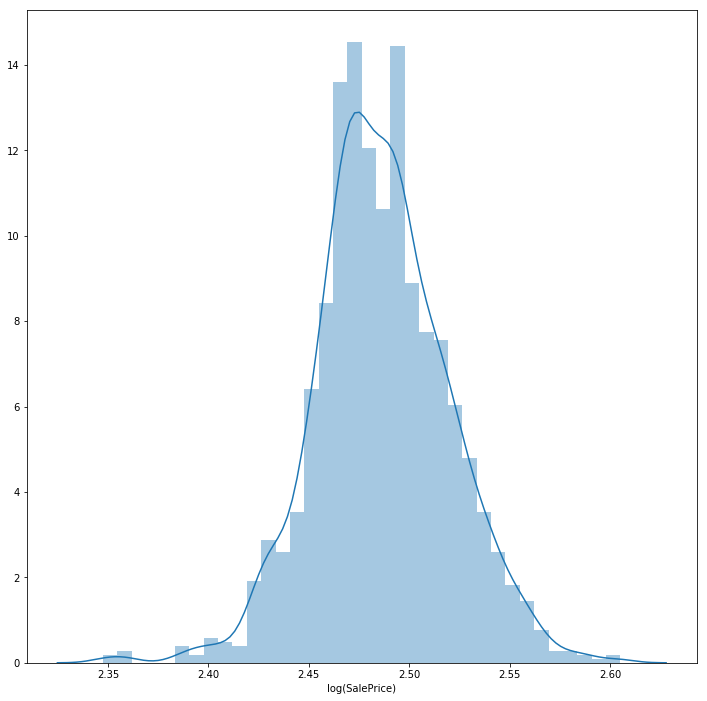

In [83]:
plt.figure(figsize=(12,12))
sns.distplot(np.log(train_data['SalePrice']))
plt.xlabel('log(SalePrice)')

In [114]:
# second feature matrix
X_train_stk = pd.DataFrame( {'XGB': xgb_gs.predict(X_train_sp),
                            'RF': rf_gs.predict(X_train_sp),
                            'SVR': svr_gs.predict(X_train_sp),
                            'LR': lr.predict(X_train_sp),
                            'LASSO':lasso_gs.predict(X_train_sp)
    })
X_test_stk = pd.DataFrame( {'XGB': xgb_gs.predict(X_test_sp),
     'RF': rf_gs.predict(X_test_sp),
     'SVR': svr_gs.predict(X_test_sp),
      'LR': lr.predict(X_test_sp),
      'LASSO':lasso_gs.predict(X_test_sp)
    })

In [115]:
rf_stk=RandomForestRegressor()
rf_parameters_stk= {'n_estimators':[100,250,500], 'max_depth':[3,4,5,6]}
rf_gs_stk=GridSearchCV(rf_stk, rf_parameters_stk,cv=kf_5)

rf_gs_stk.fit(X_train_stk,y_train_sp)
y_pred_stk_rf=rf_gs_stk.predict(X_test_stk)

In [116]:
print('RMSE')
print('train: %.3f' % (mse(np.exp(y_train_sp), np.exp(rf_gs_stk.predict(X_train_stk))) ** (1/2)))
print('test : %.3f' % (mse(np.exp(y_test_sp), np.exp(rf_gs_stk.predict(X_test_stk))) ** (1/2)))

RMSE
train: 3176.890
test : 75866.150


In [117]:
from sklearn.linear_model import LinearRegression
lr_stk=LinearRegression()

lr_stk.fit(X_train_stk,y_train_sp)
y_pred_a=lr_stk.predict(X_test_stk)
y_pred_a=np.exp(y_pred_a)

In [118]:
print('RMSE')
print('train: %.3f' % (mse(np.exp(y_train_sp), np.exp(lr_stk.predict(X_train_stk))) ** (1/2)))
print('test : %.3f' % (mse(np.exp(y_test_sp), np.exp(lr_stk.predict(X_test_stk))) ** (1/2)))

RMSE
train: 6985.169
test : 43339.865


In [119]:
# XGBoost
import xgboost as xgb

print("Parameter optimization")
xgb_model_stk = xgb.XGBRegressor()
xgb_gs_stk = GridSearchCV(xgb_model_stk,
                   {'max_depth': [2,4,6,8],
                    'n_estimators': [5,10,25,50,100,200,250,300,350]},cv=kf_5, verbose=1)
xgb_gs_stk.fit(X_train_stk, y_train_sp)
print(xgb_gs_stk.best_params_)

Parameter optimization
Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 8, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   19.6s finished


In [120]:
print('RMSE')
print('train: %.3f' % (mse(np.exp(y_train_sp), np.exp(xgb_gs_stk.predict(X_train_stk))) ** (1/2)))
print('test : %.3f' % (mse(np.exp(y_test_sp), np.exp(xgb_gs_stk.predict(X_test_stk))) ** (1/2)))

RMSE
train: 1670.121
test : 73916.025


In [121]:
submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": np.exp(lr.predict(X_test_pickup))
})
submission.to_csv('houseprice2.csv', index=False)